# Looking at the hit file

Jita (06 Feb 2023)

In [1]:
# Set up python environment
from pygama.raw.build_raw import build_raw
from pygama.dsp import build_dsp
#from pygama.lgdo import ls
import pygama.lgdo.lh5_store as lh5 
from pygama.vis.waveform_browser import WaveformBrowser

hit_file = "/global/cscratch1/sd/jita/LGND-Data/r010/hit/l200-p02-r010-cal-20230126T023019Z-tier_hit.lh5"

## Inspecting the hit file

In [2]:
print("List of hit file elements:")
lh5.ls(hit_file)

List of hit file elements:


['ch004',
 'ch005',
 'ch006',
 'ch007',
 'ch008',
 'ch009',
 'ch010',
 'ch012',
 'ch013',
 'ch018',
 'ch019',
 'ch020',
 'ch021',
 'ch022',
 'ch023',
 'ch024',
 'ch025',
 'ch030',
 'ch031',
 'ch032',
 'ch034',
 'ch035',
 'ch036',
 'ch037',
 'ch038',
 'ch039',
 'ch040',
 'ch041',
 'ch042',
 'ch043',
 'ch044',
 'ch045',
 'ch049',
 'ch053',
 'ch054',
 'ch055',
 'ch056',
 'ch057',
 'ch060',
 'ch061',
 'ch062',
 'ch063',
 'ch064',
 'ch065',
 'ch066',
 'ch067',
 'ch068',
 'ch069',
 'ch070',
 'ch071',
 'ch072',
 'ch073',
 'ch074',
 'ch075',
 'ch076',
 'ch081',
 'ch082',
 'ch083',
 'ch086',
 'ch087',
 'ch088',
 'ch089',
 'ch090',
 'ch091',
 'ch092',
 'ch093',
 'ch095',
 'ch096',
 'ch097',
 'ch098',
 'ch099',
 'ch100',
 'ch101',
 'ch102',
 'ch103',
 'ch104',
 'ch106',
 'ch107',
 'ch109',
 'ch110',
 'ch111',
 'ch113',
 'ch114',
 'ch115',
 'ch118',
 'ch119',
 'ch121']

In [3]:
print("Inside the channels:")
lh5.ls(hit_file,'ch004/')

Inside the channels:


['ch004/hit']

In [4]:
print("Inside the hit tier:")
lh5.ls(hit_file,'ch004/hit/')

Inside the hit tier:


['ch004/hit/AoE_Classifier',
 'ch004/hit/AoE_Corrected',
 'ch004/hit/AoE_Double_Sided_Cut',
 'ch004/hit/AoE_Low_Cut',
 'ch004/hit/cuspEftp_ctc_cal',
 'ch004/hit/cuspEmax_ctc_cal',
 'ch004/hit/is_negative',
 'ch004/hit/is_saturated',
 'ch004/hit/is_valid_0vbb',
 'ch004/hit/is_valid_cal',
 'ch004/hit/timestamp',
 'ch004/hit/trapEmax_ctc_cal',
 'ch004/hit/trapTmax_cal',
 'ch004/hit/zacEftp_ctc_cal',
 'ch004/hit/zacEmax_ctc_cal']

In [5]:
df = lh5.load_dfs(hit_file, ['AoE_Classifier','AoE_Corrected','AoE_Double_Sided_Cut','AoE_Low_Cut','cuspEftp_ctc_cal','cuspEmax_ctc_cal','is_negative','is_saturated','is_valid_0vbb','is_valid_cal','timestamp','trapEmax_ctc_cal','trapTmax_cal','zacEftp_ctc_cal','zacEmax_ctc_cal'], 'ch004/hit')
print(df)

      AoE_Classifier  AoE_Corrected  AoE_Double_Sided_Cut  AoE_Low_Cut  \
0          -0.109329      -0.005396                  True         True   
1         -13.981805      -0.514144                 False        False   
2          -0.451076      -0.014087                  True         True   
3         -18.300245      -0.130372                 False        False   
4         -16.393005      -0.155933                 False        False   
...              ...            ...                   ...          ...   
3538       -0.665778      -0.046229                  True         True   
3539       -0.222621      -0.017765                  True         True   
3540        0.319222       0.002536                  True         True   
3541        1.043146       0.080334                  True         True   
3542       -0.899037      -0.073027                  True         True   

      cuspEftp_ctc_cal  cuspEmax_ctc_cal  is_negative  is_saturated  \
0           208.297349        208.566750

<AxesSubplot:title={'center':'zacEmax_ctc_cal'}, xlabel='Energy (keV)', ylabel='Frequency'>

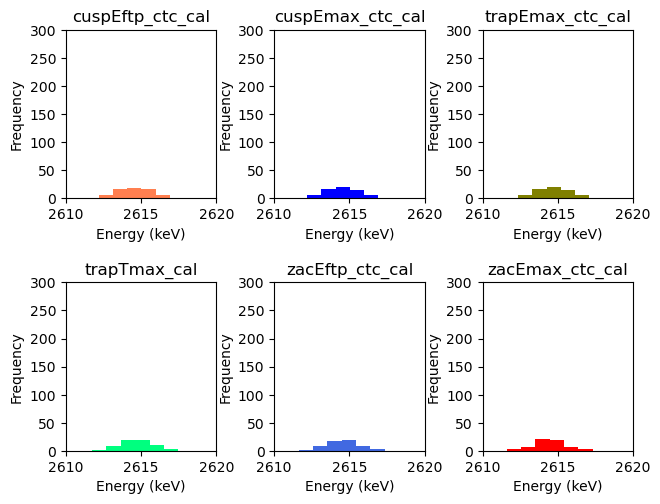

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# making subplots
fig, ax = plt.subplots(2, 3)
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.subplot(2, 3, 1)
plt.xlim([2610,2620])
plt.ylim([0,300])
plt.ylabel("Counts")
plt.xlabel("Energy (keV)")
plt.title("cuspEftp_ctc_cal")
df["cuspEftp_ctc_cal"].plot.hist(grid=False, bins=3000, rwidth=1.,color='coral')
plt.subplot(2, 3, 2)
plt.xlim([2610,2620])
plt.ylim([0,300])
plt.ylabel("Counts")
plt.xlabel("Energy (keV)")
plt.title("cuspEmax_ctc_cal")
df["cuspEmax_ctc_cal"].plot.hist(grid=False, bins=3000, rwidth=1.,color='blue')
#plt.yscale('log')
plt.subplot(2, 3, 3)
plt.xlim([2610,2620])
plt.ylim([0,300])
plt.ylabel("Counts")
plt.xlabel("Energy (keV)")
plt.title("trapEmax_ctc_cal")
df["trapEmax_ctc_cal"].plot.hist(grid=False, bins=3000, rwidth=1.,color='olive')
plt.subplot(2, 3, 4)
plt.xlim([2610,2620])
plt.ylim([0,300])
plt.ylabel("Counts")
plt.xlabel("Energy (keV)")
plt.title("trapTmax_cal")
df["trapTmax_cal"].plot.hist(grid=False, bins=3000, rwidth=1.,color='springgreen')
plt.subplot(2, 3, 5)
plt.xlim([2610,2620])
plt.ylim([0,300])
plt.ylabel("Counts")
plt.xlabel("Energy (keV)")
plt.title("zacEftp_ctc_cal")
df["zacEftp_ctc_cal"].plot.hist(grid=False, bins=3000, rwidth=1.,color='royalblue')
plt.subplot(2, 3, 6)
plt.xlim([2610,2620])
plt.ylim([0,300])
plt.ylabel("Counts")
plt.xlabel("Energy (keV)")
plt.title("zacEmax_ctc_cal")
df["zacEmax_ctc_cal"].plot.hist(grid=False, bins=3000, rwidth=1.,color='red')

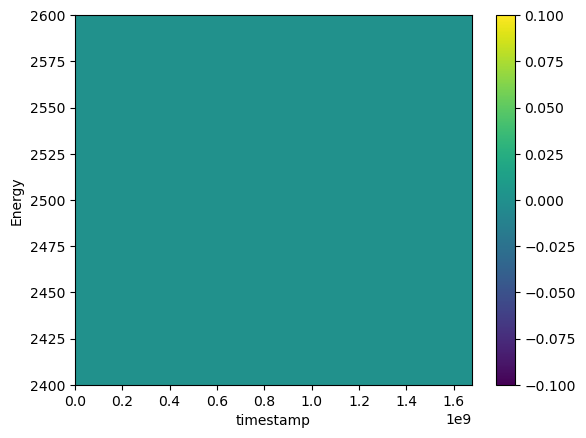

In [8]:
y=df["cuspEmax_ctc_cal"].to_numpy()
x=df["timestamp"].to_numpy()
#plt.plot(x, y,linestyle='None',marker='o', markersize=4)
plt.hist2d(x,y,bins = [100000,1000],range = [[0,1.674688e+09],[2400,2600]])
plt.ylabel("Energy")
plt.xlabel("timestamp")
plt.ylim(2400,2600)
plt.colorbar()
#plt.savefig('AotrapEmax.png')